#COMP5900 Assignment 1 (Supplementary Materials)
Use this code to answer the questions in Assignment 1

In [1]:
import torch
print(torch.__version__)

1.7.0+cu101


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
torch.cuda.is_available()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 
                             , 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
print(Net())


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [4]:
import torch.optim as optim
net=Net()
CUDA=torch.cuda.is_available()
if CUDA:
  net=net.cuda()

# Let's first define our device as the first visible cuda device if we have
# CUDA available:  
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

#In Colab, got to Edit>Notebook settings> choose Python 3. For the hardware
#accelerator, you may select None or GPU.


cuda:0


In [5]:
# 4. Train the network
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
accuracy_values=[]
epoch_number=[]
for epoch in range(10):  # loop over the dataset multiple times. Here 10 means 10 epochs
    running_loss = 0.0
    for i, (inputs,labels) in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        if CUDA:
          inputs = inputs.cuda()
          labels = labels.cuda()
        else:
          inputs = inputs.cpu()
          labels = labels.cpu()        
          
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[epoch%d, itr%5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            if CUDA:
              images = images.cuda()
              labels = labels.cuda()
            else:
              images = images.cpu()
              labels =labels.cpu()

            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            if not CUDA:
              correct += (predicted.cpu()==labels.cpu()).sum().item()
            else:
              correct += (predicted==labels).sum().item()
            
        TestAccuracy = 100 * correct / total;
        epoch_number += [epoch+1]
        accuracy_values += [TestAccuracy] 
        print('Epoch=%d Test Accuracy=%.3f' %
                  (epoch + 1, TestAccuracy))
    
print('Finished Training')

[epoch1, itr 2000] loss: 2.174
[epoch1, itr 4000] loss: 1.825
[epoch1, itr 6000] loss: 1.651
[epoch1, itr 8000] loss: 1.556
[epoch1, itr10000] loss: 1.503
[epoch1, itr12000] loss: 1.460
Epoch=1 Test Accuracy=46.440
[epoch2, itr 2000] loss: 1.387
[epoch2, itr 4000] loss: 1.344
[epoch2, itr 6000] loss: 1.327
[epoch2, itr 8000] loss: 1.320
[epoch2, itr10000] loss: 1.281
[epoch2, itr12000] loss: 1.282
Epoch=2 Test Accuracy=54.480
[epoch3, itr 2000] loss: 1.203
[epoch3, itr 4000] loss: 1.227
[epoch3, itr 6000] loss: 1.188
[epoch3, itr 8000] loss: 1.173
[epoch3, itr10000] loss: 1.152
[epoch3, itr12000] loss: 1.145
Epoch=3 Test Accuracy=59.830
[epoch4, itr 2000] loss: 1.089
[epoch4, itr 4000] loss: 1.085
[epoch4, itr 6000] loss: 1.083
[epoch4, itr 8000] loss: 1.080
[epoch4, itr10000] loss: 1.081
[epoch4, itr12000] loss: 1.071
Epoch=4 Test Accuracy=60.150
[epoch5, itr 2000] loss: 1.009
[epoch5, itr 4000] loss: 1.013
[epoch5, itr 6000] loss: 1.032
[epoch5, itr 8000] loss: 1.024
[epoch5, itr1000

In [6]:
print (torch.cuda.is_available())
print (torch.cuda.device_count())

True
1


In [7]:
epoch_number

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

[46.44, 54.48, 59.83, 60.15, 62.43, 62.83, 63.06, 63.14, 63.24, 62.89]


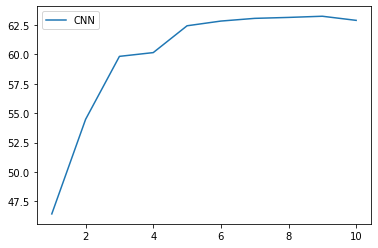

In [8]:
import matplotlib.pyplot as plt
import numpy as np

print(accuracy_values)
# Plot the data
plt.plot(epoch_number, accuracy_values, label='CNN')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Anything better than 10% accuracy (randomly picking a class out of 10 classes)
# means the network has learned something.

Network with 0 hidden layer

Question: 
1. Pooling layer belongs to hidden layer or not?
2. What is the size of the input data? [4 * 3 * 32 *32]
3. What is the meaning of each number?
4. Why I cannot use the dimension with (4 * 3 * 32 * 32, 10) in a FC layer?
5. Why there is no activation function?



In [9]:
class Net_without_hidden_layer(nn.Module):
    def __init__(self):
        super(Net_without_hidden_layer, self).__init__()
        # self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(3*32*32, 10)
        

    def forward(self, x):
        # x = self.pool(x)
        # print("1 and {0}".format(x.size()))
        x = x.view(-1, 3*32*32)
        # print("2 and {0}".format(x.size()))
        x = self.fc1(x)
        return x
print(Net_without_hidden_layer())

Net_without_hidden_layer(
  (fc1): Linear(in_features=3072, out_features=10, bias=True)
)


In [10]:
net_no_h = Net_without_hidden_layer()
if CUDA:
  net_no_h = net_no_h.cuda()

In [11]:
# Training step
# criterion = nn.CrossEntropyLoss
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
accuracy_values_without_h = []

for epoch in range(10):
    running_loss = 0.0
    for i, (inputs,labels) in enumerate(trainloader, 0):
      # get the inputs; data is a list of [inputs, labels]
      if CUDA:
        inputs = inputs.cuda()
        labels = labels.cuda()
      else:
        inputs = inputs.cpu()
        labels = labels.cpu() 
      if i == 0:
        print(inputs.size())
        print(labels.size())

      optimizer.zero_grad()
      # print("input_size={0}".format(inputs.size()))
      outputs = net_no_h(inputs)
      # print("outputs_size={0}".format(outputs.size()))
      # print("labels_size={0}".format(labels.size()))
      # print(torch.squeeze(labels).long().size())
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step() # how optimizer works?

      running_loss += loss.item()
      if i % 2000 == 1999:
          print('[epoch%d, itr%5d] loss: %.3f' %
              ( epoch + 1, i + 1, running_loss / 2000))
          running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            if CUDA:
              images = images.cuda()
              labels = labels.cuda()
            else:
              images = images.cuda()
              labels = labels.cuda()

            outputs = net_no_h(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            if not CUDA:
              correct += (predicted.cpu() == labels.cpu()).sum().item()
            else:
              correct += (predicted == labels).sum().item()

        TestAccuracy = 100 * correct / total
        accuracy_values_without_h += [TestAccuracy]
        print('Epoch=%d Test Accracy=%.3f' %(epoch+1, TestAccuracy))

print('Finish Training (0 hidden layer)')



torch.Size([4, 3, 32, 32])
torch.Size([4])
[epoch1, itr 2000] loss: 2.396
[epoch1, itr 4000] loss: 2.390
[epoch1, itr 6000] loss: 2.396
[epoch1, itr 8000] loss: 2.394
[epoch1, itr10000] loss: 2.392
[epoch1, itr12000] loss: 2.402
Epoch=1 Test Accracy=7.200
torch.Size([4, 3, 32, 32])
torch.Size([4])
[epoch2, itr 2000] loss: 2.398
[epoch2, itr 4000] loss: 2.397
[epoch2, itr 6000] loss: 2.395
[epoch2, itr 8000] loss: 2.395
[epoch2, itr10000] loss: 2.395
[epoch2, itr12000] loss: 2.394
Epoch=2 Test Accracy=7.200
torch.Size([4, 3, 32, 32])
torch.Size([4])
[epoch3, itr 2000] loss: 2.395
[epoch3, itr 4000] loss: 2.396
[epoch3, itr 6000] loss: 2.395
[epoch3, itr 8000] loss: 2.394
[epoch3, itr10000] loss: 2.396
[epoch3, itr12000] loss: 2.395
Epoch=3 Test Accracy=7.200
torch.Size([4, 3, 32, 32])
torch.Size([4])
[epoch4, itr 2000] loss: 2.395
[epoch4, itr 4000] loss: 2.398
[epoch4, itr 6000] loss: 2.396
[epoch4, itr 8000] loss: 2.390
[epoch4, itr10000] loss: 2.401
[epoch4, itr12000] loss: 2.391
Epo

Network with 1 hidden layer

In [12]:
class Net_with_one_hidden_layer(nn.Module):
    def __init__(self):
        super(Net_with_one_hidden_layer, self).__init__()
        # self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(3*32*32, 120)
        self.fc2 = nn.Linear(120, 10)


    def forward(self, x):
        # x = self.pool(x)
        x = x.view(-1, 3*32*32) # I think it is to flatten the image to 1 dimension
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
print(Net_with_one_hidden_layer())

Net_with_one_hidden_layer(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)


In [13]:
net_with_1_h = Net_with_one_hidden_layer()
if CUDA:
    net_with_1_h = net_with_1_h.cuda()

In [14]:
# Training with 1 hidden layers
# criterion is Cross Entropy loss
# optimizer is SGD

accuracy_values_1_h = []

for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        else:
            inputs = inputs.cpu()
            labels = labels.cpu()
        
        optimizer.zero_grad()

        outputs = net_with_1_h(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[epoch%d, itr%5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0

    correct = 0
    total = 0
    count = 0
    with torch.no_grad():
        for image, labels in testloader:
            count += 1
            if CUDA:
              images = images.cuda()
              labels = labels.cuda()
            else:
              images = images.cpu()
              labels =labels.cpu()
            
            outputs = net_with_1_h(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            if not CUDA:
              correct += (predicted.cpu()==labels.cpu()).sum().item()
            else:
              correct += (predicted==labels).sum().item()
          
        TestAccuracy = 100 * correct / total
        accuracy_values_1_h += [TestAccuracy]
        print('Epoch=%d Test Accuracy=%.3f' % (epoch+1, TestAccuracy))

print('Finished Training with 1 hidden layer')
  

[epoch1, itr 2000] loss: 2.312
[epoch1, itr 4000] loss: 2.311
[epoch1, itr 6000] loss: 2.312
[epoch1, itr 8000] loss: 2.314
[epoch1, itr10000] loss: 2.315
[epoch1, itr12000] loss: 2.313
1
4
2
4
Epoch=1 Test Accuracy=10.290
[epoch2, itr 2000] loss: 2.312
[epoch2, itr 4000] loss: 2.313
[epoch2, itr 6000] loss: 2.311
[epoch2, itr 8000] loss: 2.316
[epoch2, itr10000] loss: 2.311
[epoch2, itr12000] loss: 2.314
1
4
2
4
Epoch=2 Test Accuracy=10.290
[epoch3, itr 2000] loss: 2.314
[epoch3, itr 4000] loss: 2.312
[epoch3, itr 6000] loss: 2.314
[epoch3, itr 8000] loss: 2.315
[epoch3, itr10000] loss: 2.310
[epoch3, itr12000] loss: 2.312
1
4
2
4
Epoch=3 Test Accuracy=10.290
[epoch4, itr 2000] loss: 2.312
[epoch4, itr 4000] loss: 2.311
[epoch4, itr 6000] loss: 2.312
[epoch4, itr 8000] loss: 2.311
[epoch4, itr10000] loss: 2.314
[epoch4, itr12000] loss: 2.316
1
4
2
4
Epoch=4 Test Accuracy=10.290
[epoch5, itr 2000] loss: 2.314
[epoch5, itr 4000] loss: 2.314
[epoch5, itr 6000] loss: 2.311
[epoch5, itr 80

Newwork with 2 hidden layers


In [15]:
class Net_with_two_hidden_layer(nn.Module):
    def __init__(self):
        super(Net_with_two_hidden_layer, self).__init__()
        # self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(3*32*32, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 10)
      



    def forward(self, x):
        # x = self.pool(x)
        x = x.view(-1, 3*32*32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
print(Net_with_two_hidden_layer())

Net_with_two_hidden_layer(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [16]:
net_with_2_h = Net_with_two_hidden_layer()
if CUDA:
  net_with_2_h = net_with_2_h.cuda()
  

In [17]:
# Training with 2 hidden layers
# criterion is Cross Entropy loss
# optimizer is SGD

accuracy_values_2_h = []

for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        else:
            inputs = inputs.cpu()
            labels = labels.cpu()
        
        optimizer.zero_grad()

        outputs = net_with_2_h(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[epoch%d, itr%5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0

    correct = 0
    total = 0
    count = 0
    with torch.no_grad():
        for image, labels in testloader:
            count += 1
            if CUDA:
                images = images.cuda()
                labels = labels.cuda()
            else:
                images = images.cpu()
                labels =labels.cpu()
            
            outputs = net_with_2_h(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            if not CUDA:
                correct += (predicted.cpu()==labels.cpu()).sum().item()
            else:
                correct += (predicted==labels).sum().item()
        
        TestAccuracy = 100 * correct / total
        accuracy_values_2_h += [TestAccuracy]
        print('Epoch=%d Test Accuracy=%.3f' % (epoch+1, TestAccuracy))

print('Finished Training with 2 hidden layer')
  

[epoch1, itr 2000] loss: 2.307
[epoch1, itr 4000] loss: 2.306
[epoch1, itr 6000] loss: 2.307
[epoch1, itr 8000] loss: 2.307
[epoch1, itr10000] loss: 2.307
[epoch1, itr12000] loss: 2.306
Epoch=1 Test Accuracy=10.000
[epoch2, itr 2000] loss: 2.307
[epoch2, itr 4000] loss: 2.308
[epoch2, itr 6000] loss: 2.307
[epoch2, itr 8000] loss: 2.306
[epoch2, itr10000] loss: 2.306
[epoch2, itr12000] loss: 2.308
Epoch=2 Test Accuracy=10.000
[epoch3, itr 2000] loss: 2.307
[epoch3, itr 4000] loss: 2.307
[epoch3, itr 6000] loss: 2.307
[epoch3, itr 8000] loss: 2.306
[epoch3, itr10000] loss: 2.307
[epoch3, itr12000] loss: 2.307
Epoch=3 Test Accuracy=10.000
[epoch4, itr 2000] loss: 2.307
[epoch4, itr 4000] loss: 2.307
[epoch4, itr 6000] loss: 2.306
[epoch4, itr 8000] loss: 2.307
[epoch4, itr10000] loss: 2.306
[epoch4, itr12000] loss: 2.307
Epoch=4 Test Accuracy=10.000
[epoch5, itr 2000] loss: 2.306
[epoch5, itr 4000] loss: 2.308
[epoch5, itr 6000] loss: 2.307
[epoch5, itr 8000] loss: 2.307
[epoch5, itr1000

Newwork with 3 hidden layers


In [18]:
class Net_with_three_hidden_layer(nn.Module):
    def __init__(self):
        super(Net_with_three_hidden_layer, self).__init__()
        # self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(3*32*32, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 120)
        self.fc4 = nn.Linear(120, 10)

      

    def forward(self, x):
        # x = self.pool(x)
        x = x.view(-1, 3*32*32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
print(Net_with_three_hidden_layer())

Net_with_three_hidden_layer(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=120, bias=True)
  (fc4): Linear(in_features=120, out_features=10, bias=True)
)


In [19]:
net_with_3_h = Net_with_three_hidden_layer()
if CUDA:
  net_with_3_h = net_with_3_h.cuda()

In [20]:
# Training with 3 hidden layers
# criterion is Cross Entropy loss
# optimizer is SGD

accuracy_values_3_h = []

for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        else:
            inputs = inputs.cpu()
            labels = labels.cpu()
        
        optimizer.zero_grad()
        
        outputs = net_with_3_h(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
          print('[epoch%d, itr%5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
          running_loss = 0.0

    correct = 0
    total = 0
    count = 0
    with torch.no_grad():
        for images, labels in testloader:
            count += 1
            if CUDA:
                images = images.cuda()
                labels = labels.cuda()
            else:
                images = images.cpu()
                labels =labels.cpu()
            
            outputs = net_with_3_h(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            if not CUDA:
                correct += (predicted.cpu()==labels.cpu()).sum().item()
            else:
                correct += (predicted==labels).sum().item()
        
        TestAccuracy = 100 * correct / total
        accuracy_values_3_h += [TestAccuracy]
        print('Epoch=%d Test Accuracy=%.3f' % (epoch+1, TestAccuracy))

print('Finished Training with 3 hidden layer')
  

[epoch1, itr 2000] loss: 2.302
[epoch1, itr 4000] loss: 2.303
[epoch1, itr 6000] loss: 2.302
[epoch1, itr 8000] loss: 2.301
[epoch1, itr10000] loss: 2.302
[epoch1, itr12000] loss: 2.302
Epoch=1 Test Accuracy=11.500
[epoch2, itr 2000] loss: 2.302
[epoch2, itr 4000] loss: 2.302
[epoch2, itr 6000] loss: 2.302
[epoch2, itr 8000] loss: 2.302
[epoch2, itr10000] loss: 2.302
[epoch2, itr12000] loss: 2.302
Epoch=2 Test Accuracy=11.500
[epoch3, itr 2000] loss: 2.303
[epoch3, itr 4000] loss: 2.302
[epoch3, itr 6000] loss: 2.303
[epoch3, itr 8000] loss: 2.301
[epoch3, itr10000] loss: 2.303
[epoch3, itr12000] loss: 2.302
Epoch=3 Test Accuracy=11.500
[epoch4, itr 2000] loss: 2.303
[epoch4, itr 4000] loss: 2.302
[epoch4, itr 6000] loss: 2.302
[epoch4, itr 8000] loss: 2.302
[epoch4, itr10000] loss: 2.302
[epoch4, itr12000] loss: 2.303
Epoch=4 Test Accuracy=11.500
[epoch5, itr 2000] loss: 2.302
[epoch5, itr 4000] loss: 2.303
[epoch5, itr 6000] loss: 2.302
[epoch5, itr 8000] loss: 2.301
[epoch5, itr1000

Newwork with 4 hidden layers


In [21]:
class Net_with_four_hidden_layer(nn.Module):
    def __init__(self):
        super(Net_with_four_hidden_layer, self).__init__()
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(3*32*32, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 120)
        self.fc4 = nn.Linear(120, 120)
        self.fc5 = nn.Linear(120, 10)
      

    def forward(self, x):
        # x = self.pool(x)
        x = x.view(-1, 3*32*32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x
print(Net_with_four_hidden_layer())

Net_with_four_hidden_layer(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=120, bias=True)
  (fc4): Linear(in_features=120, out_features=120, bias=True)
  (fc5): Linear(in_features=120, out_features=10, bias=True)
)


In [22]:
net_with_4_h = Net_with_four_hidden_layer()
if CUDA:
  net_with_4_h = net_with_4_h.cuda()

In [23]:
# Training with 4 hidden layers
# criterion is Cross Entropy loss
# optimizer is SGD
accuracy_values_4_h = []
for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        else:
            inputs = inputs.cpu()
            labels = labels.cpu()

        optimizer.zero_grad()

        outputs = net_with_4_h(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[epoch%d, itr%5d] loss: %.3f' %
                  (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            if CUDA:
                images = images.cuda()
                labels = labels.cuda()
            else:
                images = images.cpu()
                labels = labels.cpu()

            outputs = net_with_4_h(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            if not CUDA:
                correct += (predicted.cpu() == labels.cpu()).sum().item()
            else:
                correct += (predicted == labels).sum().item()

        TextAccuracy = 100 * correct / total
        accuracy_values_4_h += [TextAccuracy]
        print('Epoch=%d Test Accuracy=%.3f' %
              (epoch+1, TextAccuracy))
      
print('Finished Training with 4 hidden layers')



[epoch1, itr 2000] loss: 2.304
[epoch1, itr 4000] loss: 2.305
[epoch1, itr 6000] loss: 2.304
[epoch1, itr 8000] loss: 2.305
[epoch1, itr10000] loss: 2.304
[epoch1, itr12000] loss: 2.304
Epoch=1 Test Accuracy=11.310
[epoch2, itr 2000] loss: 2.305
[epoch2, itr 4000] loss: 2.305
[epoch2, itr 6000] loss: 2.304
[epoch2, itr 8000] loss: 2.304
[epoch2, itr10000] loss: 2.303
[epoch2, itr12000] loss: 2.304
Epoch=2 Test Accuracy=11.310
[epoch3, itr 2000] loss: 2.305
[epoch3, itr 4000] loss: 2.304
[epoch3, itr 6000] loss: 2.304
[epoch3, itr 8000] loss: 2.304
[epoch3, itr10000] loss: 2.304
[epoch3, itr12000] loss: 2.305
Epoch=3 Test Accuracy=11.310
[epoch4, itr 2000] loss: 2.305
[epoch4, itr 4000] loss: 2.303
[epoch4, itr 6000] loss: 2.305
[epoch4, itr 8000] loss: 2.303
[epoch4, itr10000] loss: 2.305
[epoch4, itr12000] loss: 2.305
Epoch=4 Test Accuracy=11.310
[epoch5, itr 2000] loss: 2.304
[epoch5, itr 4000] loss: 2.305
[epoch5, itr 6000] loss: 2.304
[epoch5, itr 8000] loss: 2.304
[epoch5, itr1000

Base model: [46.44, 54.48, 59.83, 60.15, 62.43, 62.83, 63.06, 63.14, 63.24, 62.89]
Model no hidden layer: [7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2]
Model with 1 hidden layer:[10.29, 10.29, 10.29, 10.29, 10.29, 10.29, 10.29, 10.29, 10.29, 10.29]
Model with 2 hidden layer:[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
Model with 3 hidden layer:[11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5]
Model with 4 hidden layer:[11.31, 11.31, 11.31, 11.31, 11.31, 11.31, 11.31, 11.31, 11.31, 11.31]


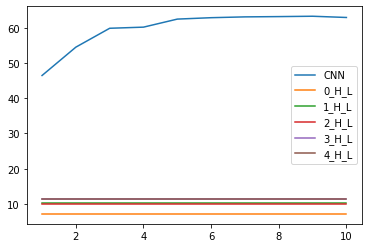

In [24]:
# test plots
import matplotlib.pyplot as plt
import numpy as np

print("Base model: {0}".format(accuracy_values))
print("Model no hidden layer: {0}".format(accuracy_values_without_h))
print("Model with 1 hidden layer:{0}".format(accuracy_values_1_h))
print("Model with 2 hidden layer:{0}".format(accuracy_values_2_h))
print("Model with 3 hidden layer:{0}".format(accuracy_values_3_h))
print("Model with 4 hidden layer:{0}".format(accuracy_values_4_h))

# Plot the data
plt.plot(epoch_number, accuracy_values, label='CNN')
plt.plot(epoch_number, accuracy_values_without_h, label='0_H_L')
plt.plot(epoch_number, accuracy_values_1_h, label='1_H_L')
plt.plot(epoch_number, accuracy_values_2_h, label='2_H_L')
plt.plot(epoch_number, accuracy_values_3_h, label='3_H_L')
plt.plot(epoch_number, accuracy_values_4_h, label='4_H_L')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Anything better than 10% accuracy (randomly picking a class out of 10 classes)
# means the network has learned something.

## Question 2
CNN with sigmoid activation function

Should I change all relu functions to sigmoid including fully connect layer?


In [25]:
class Net_sigmoid(nn.Module):
    def __init__(self):
        super(Net_sigmoid, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(torch.sigmoid(self.conv1(x)))
        x = self.pool(torch.sigmoid(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
        
print(Net_sigmoid())

Net_sigmoid(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [26]:
net_sigmoid = Net_sigmoid()
if CUDA:
    net_sigmoid = net_sigmoid.cuda()

In [27]:
# Training with sigmoid
# criterion is Cross Entropy loss
# optimizer is SGD
accuracy_sigmoid = []
for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        else:
            inputs = inputs.cpu()
            labels = labels.cpu()

        optimizer.zero_grad()

        outputs = net_sigmoid(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[epoch%d, itr%5d] %.3f' %
                  (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            if CUDA:
                images = images.cuda()
                labels = labels.cuda()
            else:
                images = images.cpu()
                labels = labels.cpu()

            outputs = net_sigmoid(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            if not CUDA:
                correct += (predicted.cpu() == labels.cpu()).sum().item()
            else:
                correct += (predicted == labels).sum().item()

        TextAccuracy = 100 * correct / total
        accuracy_sigmoid += [TextAccuracy]
        print('Epoch=%d Test Accuracy=%.3f' %
              (epoch+1, TextAccuracy))
      
print('Finished Training with sigmoid')



[epoch1, itr 2000] 2.332
[epoch1, itr 4000] 2.324
[epoch1, itr 6000] 2.329
[epoch1, itr 8000] 2.330
[epoch1, itr10000] 2.325
[epoch1, itr12000] 2.328
Epoch=1 Test Accuracy=10.000
[epoch2, itr 2000] 2.330
[epoch2, itr 4000] 2.325
[epoch2, itr 6000] 2.326
[epoch2, itr 8000] 2.327
[epoch2, itr10000] 2.328
[epoch2, itr12000] 2.331
Epoch=2 Test Accuracy=10.000
[epoch3, itr 2000] 2.325
[epoch3, itr 4000] 2.327
[epoch3, itr 6000] 2.330
[epoch3, itr 8000] 2.327
[epoch3, itr10000] 2.326
[epoch3, itr12000] 2.331
Epoch=3 Test Accuracy=10.000
[epoch4, itr 2000] 2.330
[epoch4, itr 4000] 2.325
[epoch4, itr 6000] 2.329
[epoch4, itr 8000] 2.326
[epoch4, itr10000] 2.327
[epoch4, itr12000] 2.327
Epoch=4 Test Accuracy=10.000
[epoch5, itr 2000] 2.331
[epoch5, itr 4000] 2.327
[epoch5, itr 6000] 2.329
[epoch5, itr 8000] 2.328
[epoch5, itr10000] 2.326
[epoch5, itr12000] 2.326
Epoch=5 Test Accuracy=10.000
[epoch6, itr 2000] 2.331
[epoch6, itr 4000] 2.326
[epoch6, itr 6000] 2.329
[epoch6, itr 8000] 2.326
[epoc

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]


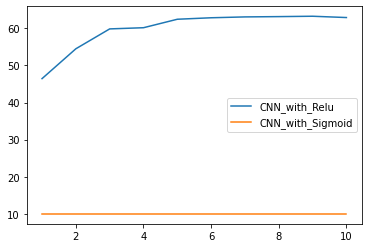

In [28]:
print(accuracy_sigmoid)

plt.plot(epoch_number, accuracy_values, label='CNN_with_Relu')
plt.plot(epoch_number, accuracy_sigmoid, label='CNN_with_Sigmoid')
plt.legend()
plt.show()

## Question 3

With 5*5 filter, SAME convolution

In [126]:
class Net_5_SAME(nn.Module):
    def __init__(self):
        super(Net_5_SAME, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=1)
        self.fc1 = nn.Linear(16*6*6, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        # print(x.size())
        x = self.pool(F.relu(self.conv1(x)))
        # print(x.size())
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.size())
        x = x.view(-1, 16*6*6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

print(Net_5_SAME())

Net_5_SAME(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [127]:
net_5_same = Net_5_SAME()
if CUDA:
    net_5_same = net_5_same.cuda()

In [128]:
accuracy_5_same = []

for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        else:
            inputs = inputs.cpu()
            labels = labels.cpu()

        optimizer.zero_grad()

        outputs = net_5_same(inputs)
        # if i == 1:
        #   print(outputs.size())
        #   print(labels.size())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
          print('[epoch%d itr%5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
          running_loss = 0.0
    
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            if CUDA:
                images = images.cuda()
                labels = labels.cuda()
            else:
                images = images.cpu()
                labels = labels.cpu()

            outputs = net_5_same(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            if not CUDA:
                correct += (predicted.cpu() == labels.cpu()).sum().item()
            else:
                correct += (predicted == labels).sum().item()
          
        TestAccuracy = 100 * correct / total
        accuracy_5_same += [TestAccuracy]
        print("Epoch=%d Test Accuracy=%.3f" %
              (epoch+1, TestAccuracy))
        
print("Finished Training with 5*5 filter in SAME convolution")        

[epoch1 itr 2000] loss: 2.304
[epoch1 itr 4000] loss: 2.304
[epoch1 itr 6000] loss: 2.304
[epoch1 itr 8000] loss: 2.303
[epoch1 itr10000] loss: 2.305
[epoch1 itr12000] loss: 2.305
Epoch=1 Test Accuracy=10.000
[epoch2 itr 2000] loss: 2.302
[epoch2 itr 4000] loss: 2.305
[epoch2 itr 6000] loss: 2.305
[epoch2 itr 8000] loss: 2.304
[epoch2 itr10000] loss: 2.305
[epoch2 itr12000] loss: 2.304
Epoch=2 Test Accuracy=10.000
[epoch3 itr 2000] loss: 2.304
[epoch3 itr 4000] loss: 2.305
[epoch3 itr 6000] loss: 2.305
[epoch3 itr 8000] loss: 2.303
[epoch3 itr10000] loss: 2.304
[epoch3 itr12000] loss: 2.304
Epoch=3 Test Accuracy=10.000
[epoch4 itr 2000] loss: 2.304
[epoch4 itr 4000] loss: 2.304
[epoch4 itr 6000] loss: 2.303
[epoch4 itr 8000] loss: 2.304
[epoch4 itr10000] loss: 2.305
[epoch4 itr12000] loss: 2.304
Epoch=4 Test Accuracy=10.000
[epoch5 itr 2000] loss: 2.304
[epoch5 itr 4000] loss: 2.304
[epoch5 itr 6000] loss: 2.304
[epoch5 itr 8000] loss: 2.304
[epoch5 itr10000] loss: 2.305
[epoch5 itr120

Network with 3*3 filter, Valid convolution

In [130]:
class Net_3_VALID(nn.Module):
    def __init__(self):
        super(Net_3_VALID, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        # print(x.size())
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.size())
        x = x.view(-1, 16 * 6 * 6)
        # print(x.size())
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

print(Net_3_VALID())

Net_3_VALID(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [131]:
net_3_valid = Net_3_VALID()
if CUDA:
    net_3_valid = net_3_valid.cuda()

In [132]:
accuracy_3_valid = []

for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        else:
            inputs = inputs.cpu()
            labels = labels.cpu()

        optimizer.zero_grad()

        outputs = net_3_valid(inputs)
        # if i == 1:
        #     print(outputs.size())
        #     print(labels.size())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
          print('[epoch%d itr%5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
          running_loss = 0.0
    
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            if CUDA:
                images = images.cuda()
                labels = labels.cuda()
            else:
                images = images.cpu()
                labels = labels.cpu()

            outputs = net_3_valid(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            if not CUDA:
                correct += (predicted.cpu() == labels.cpu()).sum().item()
            else:
                correct += (predicted == labels).sum().item()

        TestAccuracy = 100 * correct / total
        accuracy_3_valid += [TestAccuracy]
        print("Epoch=%d Test Accuracy=%.3f" %
              (epoch+1, TestAccuracy))
        
print("Finished Training with 3*3 filter in VALID convolution")        

[epoch1 itr 2000] loss: 2.305
[epoch1 itr 4000] loss: 2.304
[epoch1 itr 6000] loss: 2.305
[epoch1 itr 8000] loss: 2.306
[epoch1 itr10000] loss: 2.304
[epoch1 itr12000] loss: 2.305
Epoch=1 Test Accuracy=10.000
[epoch2 itr 2000] loss: 2.304
[epoch2 itr 4000] loss: 2.304
[epoch2 itr 6000] loss: 2.306
[epoch2 itr 8000] loss: 2.304
[epoch2 itr10000] loss: 2.304
[epoch2 itr12000] loss: 2.305
Epoch=2 Test Accuracy=10.000
[epoch3 itr 2000] loss: 2.304
[epoch3 itr 4000] loss: 2.305
[epoch3 itr 6000] loss: 2.305
[epoch3 itr 8000] loss: 2.305
[epoch3 itr10000] loss: 2.305
[epoch3 itr12000] loss: 2.304
Epoch=3 Test Accuracy=10.000
[epoch4 itr 2000] loss: 2.305
[epoch4 itr 4000] loss: 2.305
[epoch4 itr 6000] loss: 2.305
[epoch4 itr 8000] loss: 2.305
[epoch4 itr10000] loss: 2.304
[epoch4 itr12000] loss: 2.304
Epoch=4 Test Accuracy=10.000
[epoch5 itr 2000] loss: 2.304
[epoch5 itr 4000] loss: 2.305
[epoch5 itr 6000] loss: 2.305
[epoch5 itr 8000] loss: 2.305
[epoch5 itr10000] loss: 2.305
[epoch5 itr120

Network with 3*3 filter, SAME convolution

In [133]:
class Net_3_SAME(nn.Module):
    def __init__(self):
        super(Net_3_SAME, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3, padding=1)
        self.fc1 = nn.Linear(16*8*8, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*8*8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # x = F.softmax(self.fc3(x))
        x = self.fc3(x)
        return x

print(Net_3_SAME())

Net_3_SAME(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [134]:
net_3_same = Net_3_SAME()
if CUDA:
    net_3_same = net_3_same.cuda()

In [135]:
accuracy_3_same = []

for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        else:
            inputs = inputs.cpu()
            labels = labels.cpu()

        optimizer.zero_grad()

        outputs = net_3_same(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
          print('[epoch%d itr%5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
          running_loss = 0.0
    
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            if CUDA:
                images = images.cuda()
                labels = labels.cuda()
            else:
                images = images.cpu()
                labels = labels.cpu()

            outputs = net_3_same(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            if not CUDA:
                correct += (predicted.cpu() == labels.cpu()).sum().item()
            else:
                correct += (predicted == labels).sum().item()

        TestAccuracy = 100 * correct / total
        accuracy_3_same += [TestAccuracy]
        print("Epoch=%d Test Accuracy=%.3f" %
              (epoch+1, TestAccuracy))
        
print("Finished Training with 3*3 filter in SAME convolution")        

[epoch1 itr 2000] loss: 2.304
[epoch1 itr 4000] loss: 2.303
[epoch1 itr 6000] loss: 2.303
[epoch1 itr 8000] loss: 2.304
[epoch1 itr10000] loss: 2.304
[epoch1 itr12000] loss: 2.305
Epoch=1 Test Accuracy=9.110
[epoch2 itr 2000] loss: 2.303
[epoch2 itr 4000] loss: 2.304
[epoch2 itr 6000] loss: 2.304
[epoch2 itr 8000] loss: 2.304
[epoch2 itr10000] loss: 2.304
[epoch2 itr12000] loss: 2.304
Epoch=2 Test Accuracy=9.110
[epoch3 itr 2000] loss: 2.304
[epoch3 itr 4000] loss: 2.304
[epoch3 itr 6000] loss: 2.304
[epoch3 itr 8000] loss: 2.303
[epoch3 itr10000] loss: 2.305
[epoch3 itr12000] loss: 2.304
Epoch=3 Test Accuracy=9.110
[epoch4 itr 2000] loss: 2.303
[epoch4 itr 4000] loss: 2.305
[epoch4 itr 6000] loss: 2.304
[epoch4 itr 8000] loss: 2.304
[epoch4 itr10000] loss: 2.302
[epoch4 itr12000] loss: 2.305
Epoch=4 Test Accuracy=9.110
[epoch5 itr 2000] loss: 2.304
[epoch5 itr 4000] loss: 2.303
[epoch5 itr 6000] loss: 2.304
[epoch5 itr 8000] loss: 2.303
[epoch5 itr10000] loss: 2.304
[epoch5 itr12000] 

Model with 5*5 filter (VALID): [46.44, 54.48, 59.83, 60.15, 62.43, 62.83, 63.06, 63.14, 63.24, 62.89]
Model with 5*5 filter (SAME):[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
Model with 3*3 filter (VALID):[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
Model with 3*3 filter (SAME):[9.11, 9.11, 9.11, 9.11, 9.11, 9.11, 9.11, 9.11, 9.11, 9.11]


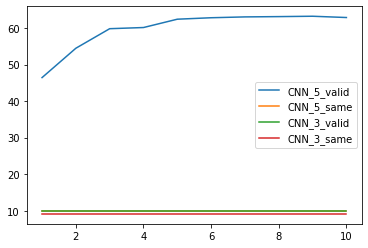

In [136]:
# test plots
import matplotlib.pyplot as plt
import numpy as np

print("Model with 5*5 filter (VALID): {0}".format(accuracy_values))
print("Model with 5*5 filter (SAME):{0}".format(accuracy_5_same))
print("Model with 3*3 filter (VALID):{0}".format(accuracy_3_valid))
print("Model with 3*3 filter (SAME):{0}".format(accuracy_3_same))

# Plot the data
plt.plot(epoch_number, accuracy_values, label='CNN_5_valid')
plt.plot(epoch_number, accuracy_5_same, label='CNN_5_same')
plt.plot(epoch_number, accuracy_3_valid, label='CNN_3_valid')

plt.plot(epoch_number, accuracy_3_same, label='CNN_3_same')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Anything better than 10% accuracy (randomly picking a class out of 10 classes)
# means the network has learned something.

#Additional code to explore the dataset and the trained model

In [ ]:
# Show some random training images

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
# Test the network on some test images

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# The outputs are energies for the 10 classes.
# The higher the energy for a class, the more the network
# thinks that the image is of the particular class.
# So, let's get the index of the highest energy:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


In [ ]:
# Lets check what are the classes that performed well, and the classes that did
# not perform well:

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for images, labels in testloader:
        if CUDA:
          images =images.cuda()
          labels =labels.cuda()
        else:
          images =images.cpu()
          labels =labels.cpu()     
      
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))